In [1]:
from AGMOEA import AGMOEA
from ZDTEvaluator import ZDTEvaluator
import numpy as np
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
import matplotlib.pyplot as plt

In [2]:
crossover_parameters = {
    'sbx': {'eta': 20},
    'pcx': {'sigma': 0.1, 'eta': 0.1},
    'spx': {'epsilon': 1},
    'blx_alpha': {'alpha': 0.5},
    'de_rand_1': {'cr': 1,'f': 0.5}
}

In [3]:
NP = 100
K = 5
NGBA = 10
NEXA = 100
Tmax = 250
FETmax = 25000
N = 30
M = 2
Pm = 0.5

In [8]:
def plot_values(pareto_fronts,true_pareto):
    
    num_rows = len(pareto_fronts)
    num_cols = 3
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,50))

    for i, (pareto, igd, hv) in enumerate(pareto_fronts):
        
        if num_rows == 1:
            ax0 = axs[0]
            ax1 = axs[1]
            ax2 = axs[2]
        else:
            ax0 = axs[i, 0]
            ax1 = axs[i, 1]
            ax2 = axs[i, 2]
        # Plot Pareto
        true_obj1 = [item[0] for item in true_pareto]
        true_obj2 = [item[1] for item in true_pareto]
        obj1 = [item.objectives[0] for item in pareto]
        obj2 = [item.objectives[1] for item in pareto]
        ax0.scatter(true_obj1, true_obj2, color='red', edgecolor='red', facecolor='none', label='true pareto')
        ax0.scatter(obj1, obj2, marker='o', color='b', label='calculated pareto')
        ax0.set_title('Pareto Front {}'.format(i+1))
        ax0.legend()
        
        # Plot HV
        ax1.plot(hv, color='r', label=f'Mean: {np.mean(hv):.2f}\nStd: {np.std(hv):.2f}')
        ax1.set_title('HV {}'.format(i+1))
        ax1.legend()

        # Plot IGD
        ax2.plot(igd, color='g', label=f'Mean: {np.mean(igd):.2f}\nStd: {np.std(igd):.2f}')
        ax2.set_title('IGD {}'.format(i+1))
        ax2.legend()

    plt.tight_layout()
    plt.show()

In [20]:
def run(num_run, problem_name, Pm = 0.5):
    evaluator = ZDTEvaluator(problem_name, N,M)
    pareto_fronts = []
    for i in range(num_run):
        agmoea = AGMOEA(NP, K, NGBA, NEXA, Tmax, FETmax, evaluator, crossover_parameters, Pm, N, M)
        agmoea.agmoea_algorithm()
        pareto_fronts.append((agmoea.EXA, agmoea.igd_values, agmoea.hypervolume_values))
        
    plot_values(pareto_fronts,agmoea.true_pareto)

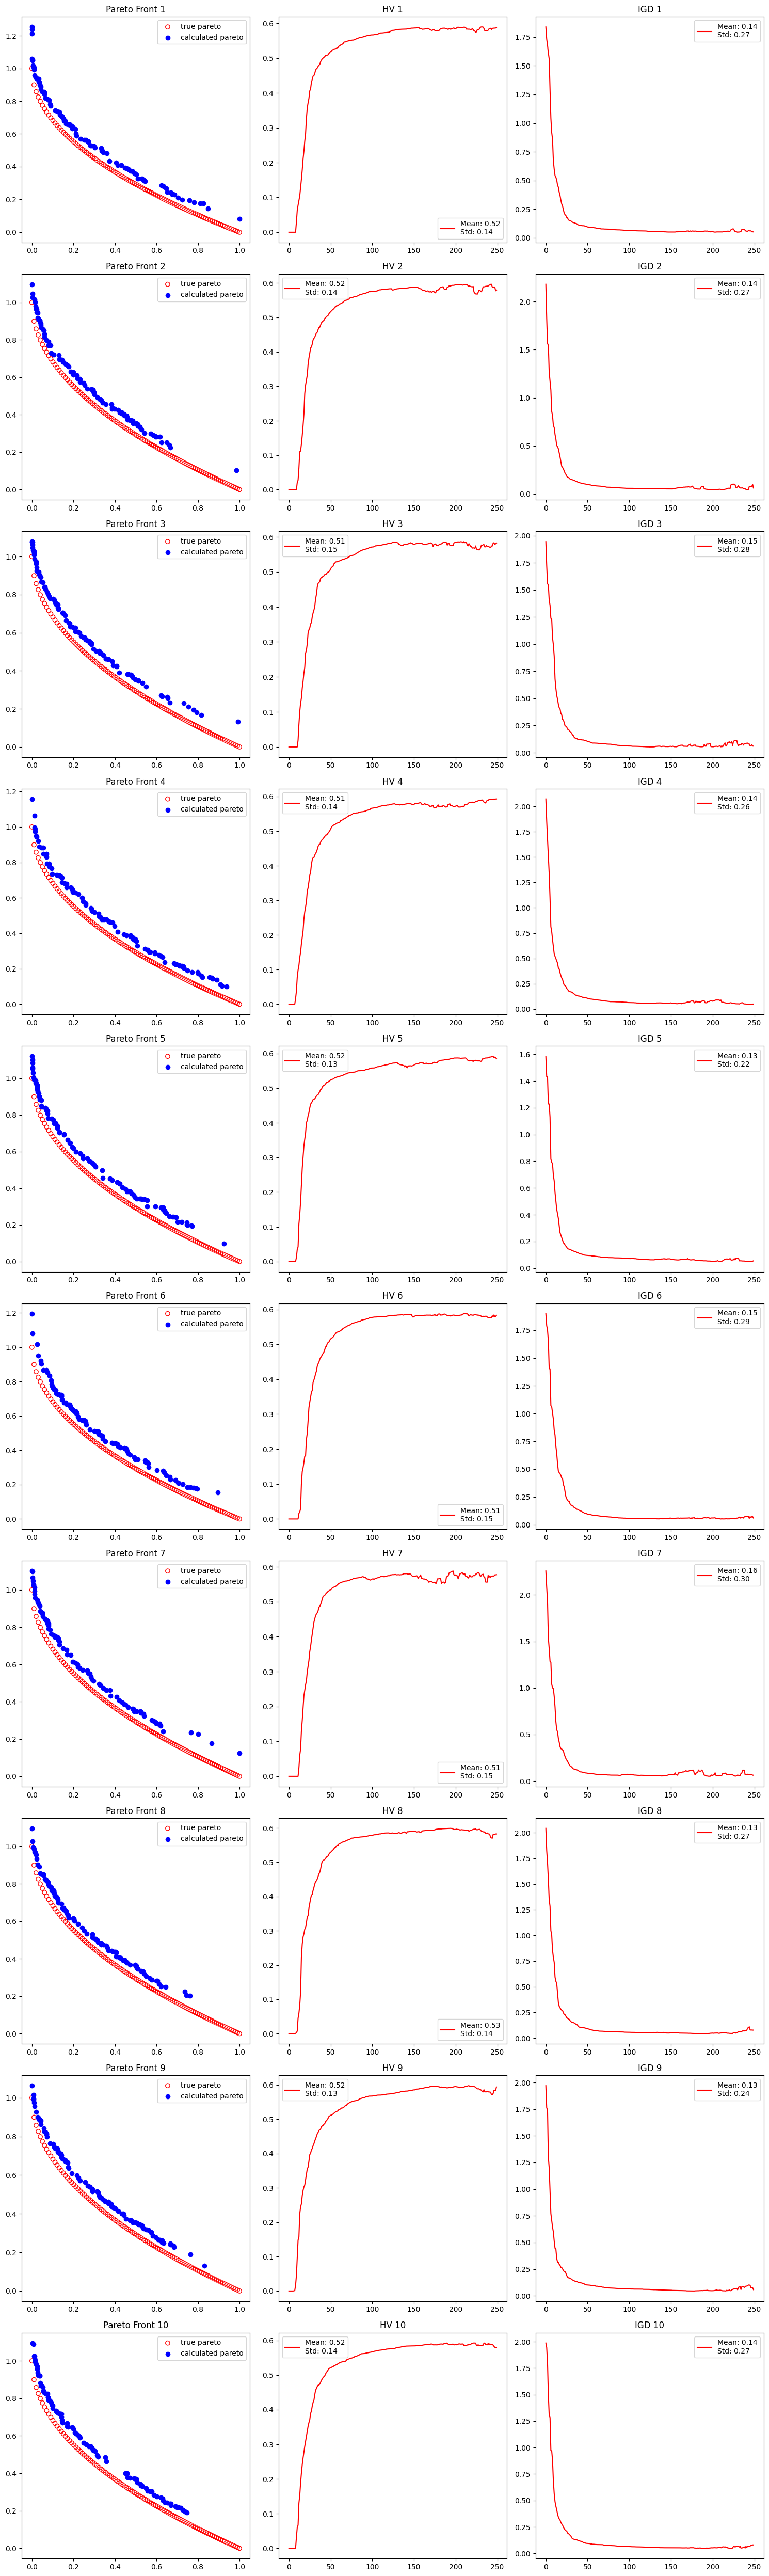

In [12]:
run(10, 'zdt1',0.4)

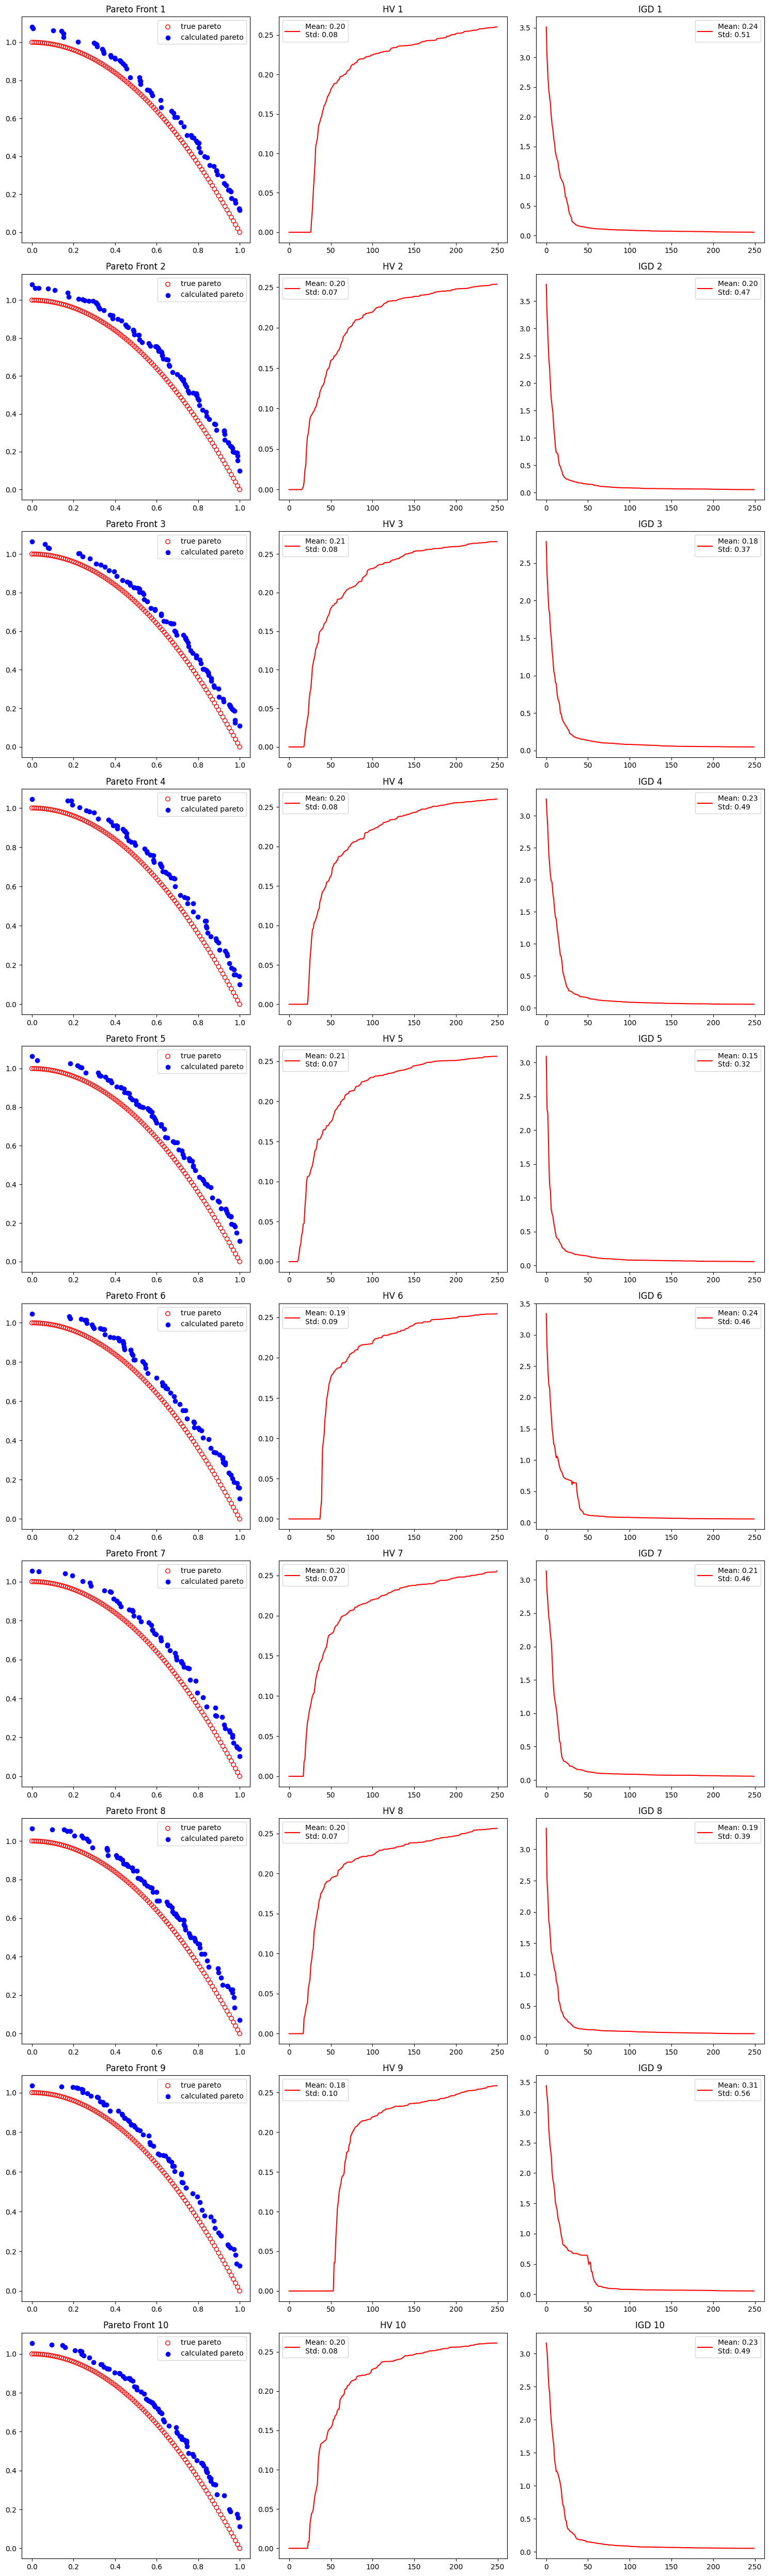

In [17]:
run(10, 'zdt2')

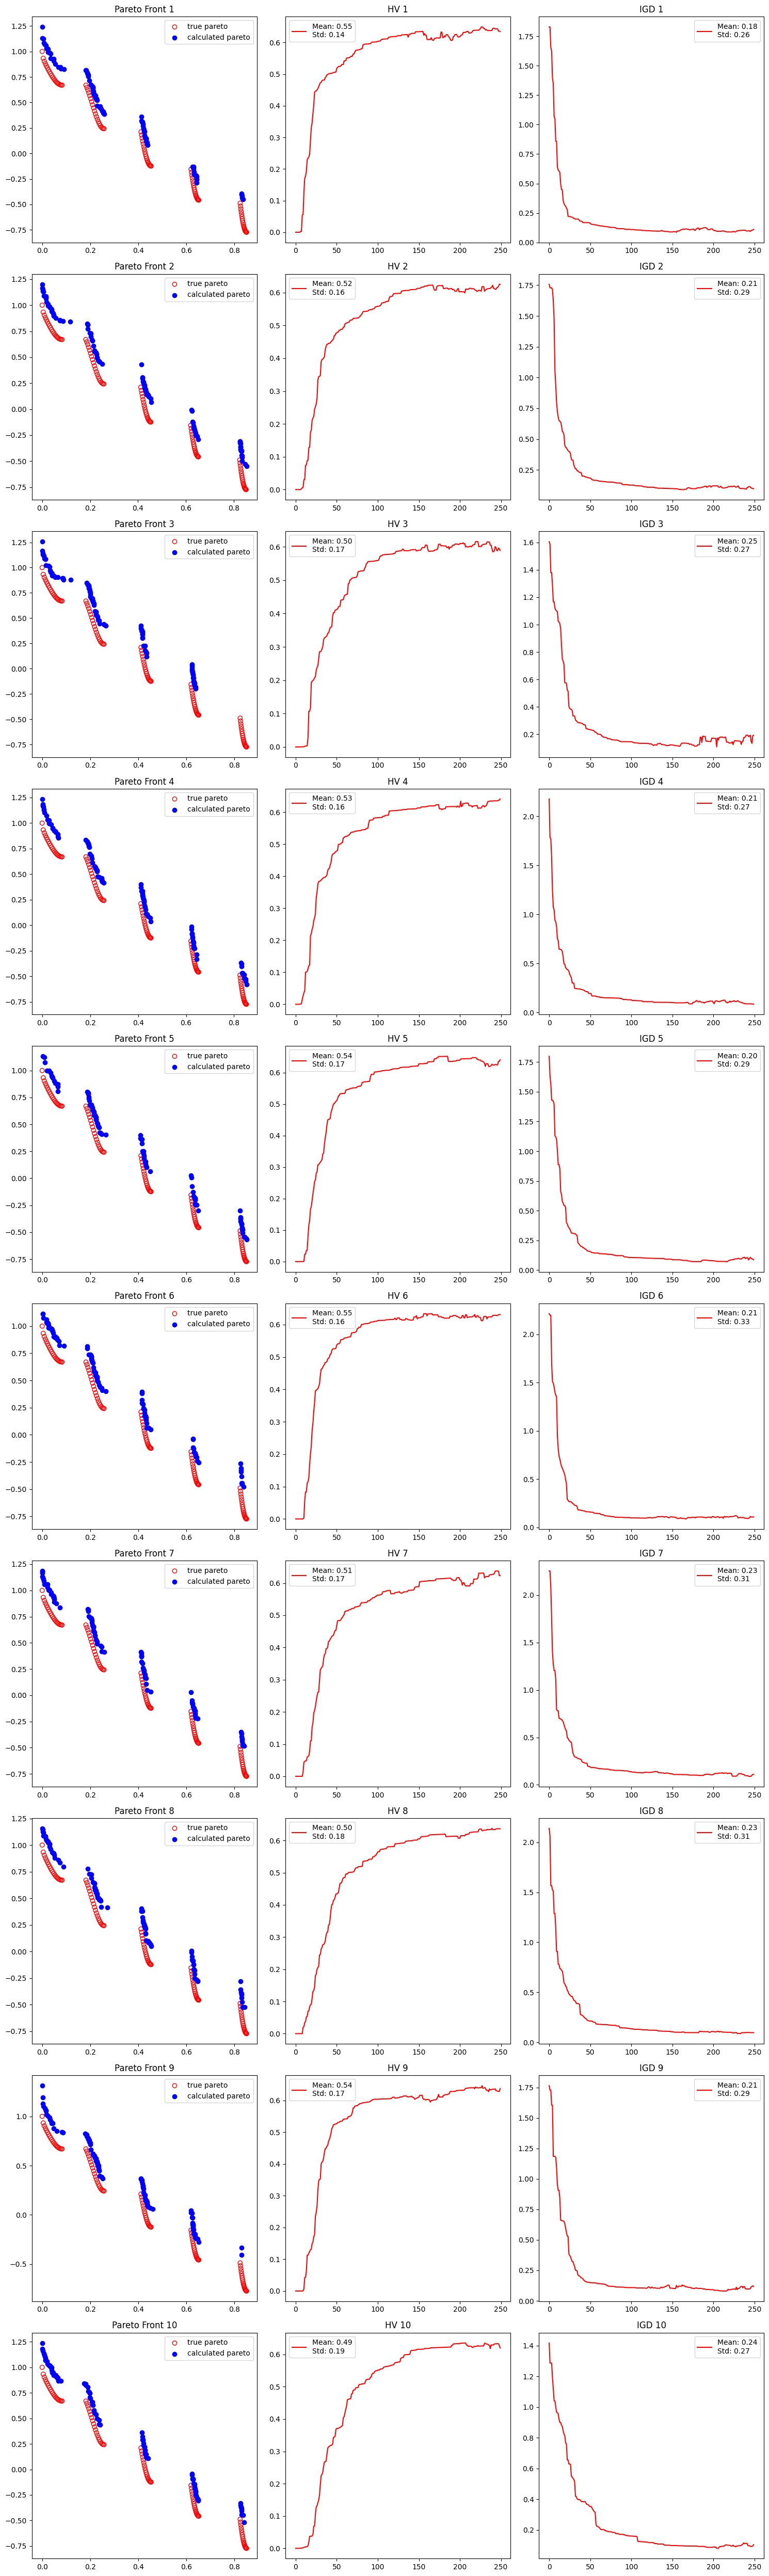

In [21]:
run(10, 'zdt3',0.7)